<a href="https://colab.research.google.com/github/AryanSai/Deep-Learning/blob/main/MyDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tensors**

In [ ]:
import torch
import numpy as np

In [ ]:
data=[[1,2,4],[3,4,6]]
x_data=torch.tensor(data)
print(x_data)
print(x_data.size())

tensor([[1, 2, 4],
        [3, 4, 6]])
torch.Size([2, 3])


In [ ]:
#retains the properties of shape and data type of the argument
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1]]) 

Random Tensor: 
 tensor([[0.1885, 0.2648, 0.1205],
        [0.5067, 0.6508, 0.2023]]) 



In [ ]:
shape = (2,4,) #dhape gives the dimensions of the tensor
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

print(rand_tensor.shape) #gives the shape of the tensor
print(rand_tensor.dtype)
print(rand_tensor.device)

Random Tensor: 
 tensor([[0.3491, 0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([2, 4])
torch.float32
cpu


In [ ]:
print(rand_tensor[0]) #indexing the tensor
print(rand_tensor)
print(rand_tensor[:,1]) #column 1
print(rand_tensor[:,-1]) #last column

tensor([0.3491, 0.2296, 0.5607, 0.5632])
tensor([[0.3491, 0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068]])
tensor([0.2296, 0.9873])
tensor([0.5632, 0.8068])


In [ ]:
#joining the tensors along the cols dimension
t1 = torch.cat([rand_tensor, rand_tensor, rand_tensor], dim=0)
print(t1)

tensor([[0.3491, 0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068],
        [0.3491, 0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068],
        [0.3491, 0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068]])


In [ ]:
#joining the tensors along the rows dimension
t1 = torch.cat([rand_tensor, rand_tensor, rand_tensor], dim=1)
print(t1)

tensor([[0.3491, 0.2296, 0.5607, 0.5632, 0.3491, 0.2296, 0.5607, 0.5632, 0.3491,
         0.2296, 0.5607, 0.5632],
        [0.5255, 0.9873, 0.9151, 0.8068, 0.5255, 0.9873, 0.9151, 0.8068, 0.5255,
         0.9873, 0.9151, 0.8068]])


In [ ]:
#Matrix Multiplication

shape=(2,4,)
tensor=torch.rand(shape)
print(tensor)
z1 = tensor * tensor
print(z1)

tensor([[0.4832, 0.4021, 0.8927, 0.7925],
        [0.3017, 0.0039, 0.3285, 0.4922]])
tensor([[2.3353e-01, 1.6166e-01, 7.9694e-01, 6.2813e-01],
        [9.1050e-02, 1.5586e-05, 1.0789e-01, 2.4225e-01]])


In [ ]:
agg = tensor.sum()
agg_item = agg.item() #converting it to a numerical value
print(agg_item, type(agg_item))

3.6969313621520996 <class 'float'>


In [ ]:
#changing from tensor to numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
#from numpy to tensor
n=np.ones(5)
tensor=torch.from_numpy(n)
print(tensor)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## **Data Loaders and datasets**

torch.utils.data.Dataset => stores the samples and their corresponding labels


 torch.utils.data.DataLoader => wraps an iterable around the Dataset to enable easy access to the samples.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#loading the training data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

#loading the test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

torch.Size([1, 28, 28])
torch.Size([28, 28])


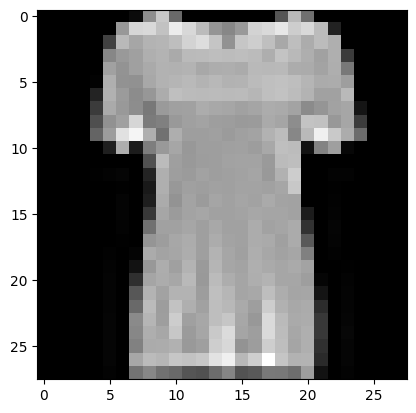

In [ ]:
image=training_data[6][0]
print(image.size())
image=training_data[10][0].view(28,28)
print(image.size())
img=np.array(image)
plt.imshow(img,cmap='gray')

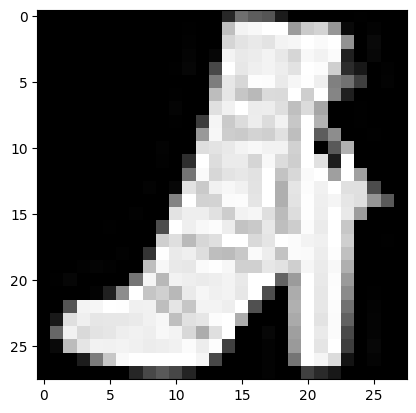

In [ ]:
img,label=training_data[11]
plt.imshow(img.squeeze(), cmap="gray")

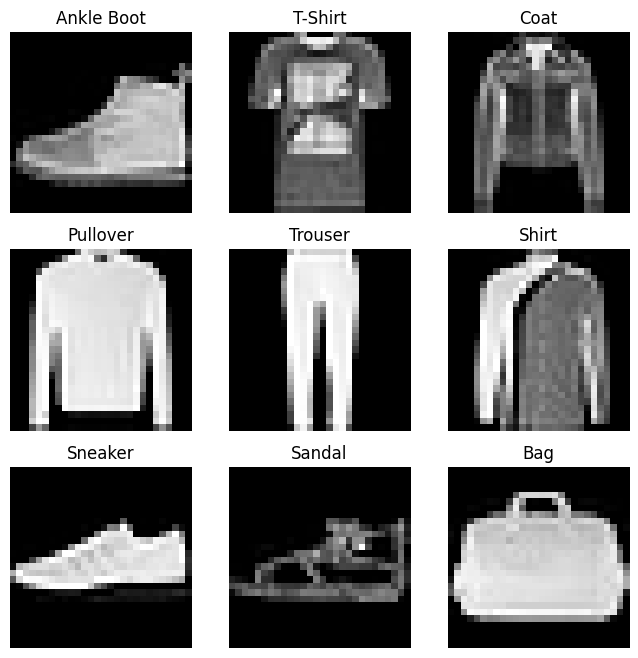

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### Data Loader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


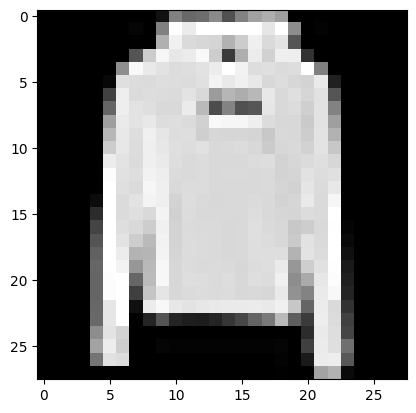

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()

## **Transforms**


data does not come in suitable form.
we need to convert that into suitable for training

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## **Building the NN**

In [ ]:
import os
import torch
from torch import nn #building blocks needed to build the NN
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #defining the NN
        super().__init__() #calling parent's constructor
        self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
        self.linear_relu_stack = nn.Sequential( #three linear layers with ReLU activations
            nn.Linear(28*28, 512), #(input,output)
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x): #defines the forward pass of the NN
        x = self.flatten(x) #flatten the input tensor
        logits = self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
        return logits

In [ ]:
#appling NN on the input tensor X
model = NeuralNetwork()
X = torch.rand(1, 28, 28) #create random tensor X with dimensions (1, 28, 28)
# 1 => batch size
# 28, 28 is height and width
# print(X)
logits = model(X) #pass the N through the model
#logits are raw scores produced by the last layer of your neural network before applying a softmax function
pred_probab = nn.Softmax(dim=1)(logits)
# apply the softmax function along dimension 1 to convert the logits into probabilities
#This step is common in classification problems to get a probability distribution over the classes.
y_pred = pred_probab.argmax(1) #find the highest
print(f"Predicted class: {y_pred}")

In [ ]:
input_image=torch.rand(3,28,28)
flatten = nn.Flatten() #a layer in PyTorch that is used to flatten the input tensor.
flat_image = flatten(input_image) #flatten the image
print(flat_image.size())

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

**ReLU:**
applied to introduce nonlinearity(here we are adding it inbetween the layers)

nn.Sequential is an ordered container of modules.

**nn.Softmax**
The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

## Autograd
supports automatic computation of gradient for any computational graph

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) #parameter
b = torch.randn(3, requires_grad=True)  #parameter
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(loss)

tensor(1.3760, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7db075d66080>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7db075d661d0>


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0479, 0.2402, 0.1811, 0.1340],
        [0.0479, 0.2402, 0.1811, 0.1340],
        [0.0479, 0.2402, 0.1811, 0.1340],
        [0.0479, 0.2402, 0.1811, 0.1340],
        [0.0479, 0.2402, 0.1811, 0.1340]])
tensor([0.0479, 0.2402, 0.1811, 0.1340])


## Optimising the model

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates (read more about hyperparameter tuning)

We define the following hyperparameters for training:
Number of Epochs - the number times to iterate over the dataset

Batch Size - the number of data samples propagated through the network before the parameters are updated

Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [11]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.292182  [   64/60000]
loss: 2.293286  [ 6464/60000]
loss: 2.276263  [12864/60000]
loss: 2.282337  [19264/60000]
loss: 2.277666  [25664/60000]
loss: 2.256054  [32064/60000]
loss: 2.249079  [38464/60000]
loss: 2.230057  [44864/60000]
loss: 2.233457  [51264/60000]
loss: 2.215891  [57664/60000]
Test Error: 
 Accuracy: 36.1%, Avg loss: 2.217155 

Epoch 2
-------------------------------
loss: 2.213931  [   64/60000]
loss: 2.220671  [ 6464/60000]
loss: 2.179869  [12864/60000]
loss: 2.194118  [19264/60000]
loss: 2.176397  [25664/60000]
loss: 2.126757  [32064/60000]
loss: 2.134613  [38464/60000]
loss: 2.082542  [44864/60000]
loss: 2.084018  [51264/60000]
loss: 2.042267  [57664/60000]
Test Error: 
 Accuracy: 48.6%, Avg loss: 2.038506 

Epoch 3
-------------------------------
loss: 2.041941  [   64/60000]
loss: 2.040229  [ 6464/60000]
loss: 1.941063  [12864/60000]
loss: 1.978456  [19264/60000]
loss: 1.932307  [25664/60000]
loss: 1.841312  [32064/600